Axes(0.125,0.11;0.775x0.77)
24     4395.324709
25     4395.324709
38     4395.324709
41     4395.324709
44    10000.000000
49     4395.324709
55        0.000000
92     4395.324709
98     4395.324709
Name: expenses, dtype: float64
0     1292.314629
1     1789.677339
2     1828.642742
3     1598.861365
4     1919.357144
         ...     
94    2086.590463
95    2192.658690
96    1558.071282
97    2076.862553
99    1428.514851
Name: expenses, Length: 91, dtype: float64


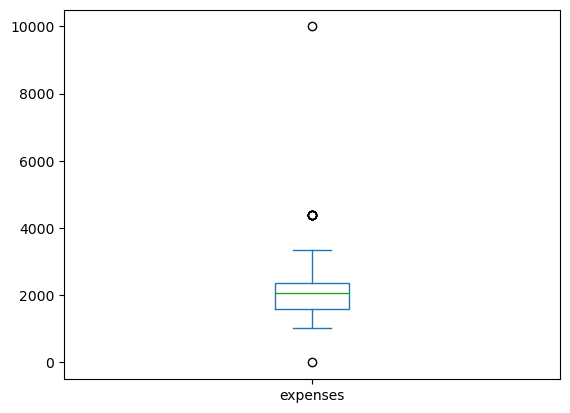

In [481]:
import pandas as pd
import numpy as np

# 랜덤 시드 고정
np.random.seed(42)

num_samples = 100


data = {
    "income": np.random.normal(loc=4000, scale=1000, size=num_samples),
    "expenses": np.random.normal(loc=2000, scale=500, size=num_samples),
}

df = pd.DataFrame(data)

# 이상치 추가
num_outliers = 7

# income 열에 대한 이상치 추가
df.loc[np.random.choice(df.index, num_outliers), "income"] = (
    df["income"].mean() + 5 * df["income"].std()
)
# expenses 열에 대한 이상치 추가
df.loc[np.random.choice(df.index, num_outliers), "expenses"] = (
    df["expenses"].mean() + 5 * df["expenses"].std()
)

df.loc[55] = [0, 0]
df.loc[44] = [10000, 10000]

# print(df.head())

print(df["expenses"].plot.box())

Q1 = df["expenses"].quantile(0.25)  # 1사분위수
Q3 = df["expenses"].quantile(0.75)  # 3사분위수
IQR = Q3 - Q1

low = Q1 - 1.5 * IQR
upp = Q3 + 1.5 * IQR

filtering = (df["expenses"] < low) | (df["expenses"] > upp)

print(df.loc[filtering, "expenses"])

df_cleaned = df.drop(index=df[filtering].index)

print(df_cleaned["expenses"])

Axes(0.125,0.11;0.775x0.77)


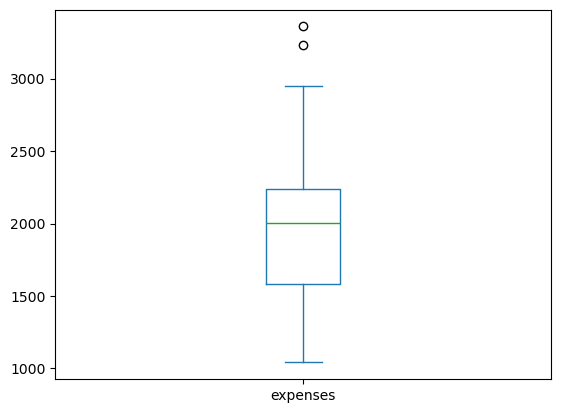

In [482]:
print(df_cleaned["expenses"].plot.box())

In [483]:
import pandas as pd
import numpy as np

# 랜덤 모듈 사용을 위한 시드 설정
np.random.seed(0)

# 학생 수와 데이터 수 설정
num_students = 1000

# 데이터프레임 생성
df = pd.DataFrame(
    {
        "ID": np.arange(1, num_students + 1),
        "Name": [f"학생{i}" for i in range(1, num_students + 1)],
        "grade": np.round(np.random.uniform(1.0, 4.5, size=num_students), 2),
    }
)

# 일부 이상치 추가
num_outliers = 50

# grade 열에 이상치 추가
outlier_indices_gpa = np.random.choice(df.index, num_outliers, replace=False)
df.loc[outlier_indices_gpa, "grade"] = np.round(
    np.random.uniform(4.5, 10.0, size=num_outliers), 2
)

In [484]:
# grade = df.loc[:,"grade"] # 얕은 복사 : 똑같은 곳을 참조해서 원본을 바꾸면 복사본도 적용됨
# # grade = df["grade"] # 깊은 복사 : 완전히 복사해서 원본을 바꿔도 복사본은 바뀌지 않음


# grade.loc[0,] = 0


# print(grade)
# print(df["grade"])

0      0.00
1      3.50
2      3.11
3      2.91
4      2.48
       ... 
995    1.34
996    2.80
997    4.28
998    1.80
999    3.37
Name: grade, Length: 1000, dtype: float64
0      0.00
1      3.50
2      3.11
3      2.91
4      2.48
       ... 
995    1.34
996    2.80
997    4.28
998    1.80
999    3.37
Name: grade, Length: 1000, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_13144\655898652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grade.loc[0,] = 0


Axes(0.125,0.11;0.775x0.77)


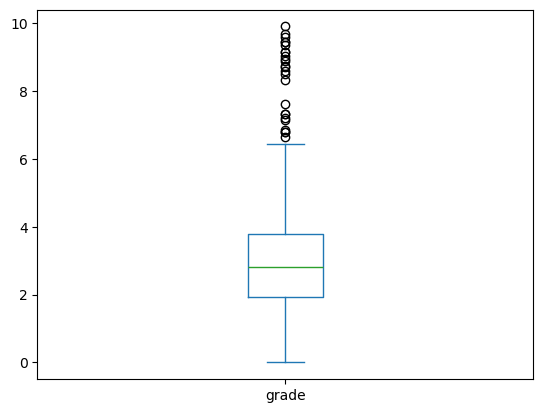

In [485]:
print(df["grade"].plot.box())

In [486]:
Q1 = df["grade"].quantile(0.25)  # 1사분위수
Q3 = df["grade"].quantile(0.75)  # 3사분위수
IQR = Q3 - Q1

low = Q1 - 1.5 * IQR
upp = Q3 + 1.5 * IQR

filtering = (df["grade"] < low) | (df["grade"] > upp)

print(df.loc[filtering, "grade"])

24     9.17
57     8.94
71     9.70
86     6.79
98     9.37
124    6.81
180    8.89
352    7.34
385    6.64
396    7.33
403    8.72
495    9.04
532    8.33
545    8.51
548    9.15
575    7.21
579    9.45
628    7.15
651    9.45
655    7.61
663    9.60
759    8.73
916    6.85
936    8.59
943    9.91
Name: grade, dtype: float64


In [487]:
# filter_row = df.loc[filtering]
# print(filter_row)
# # filter_row["grade"] = df["grade"].mean()

# # print(df.loc[filtering])

<Axes: >

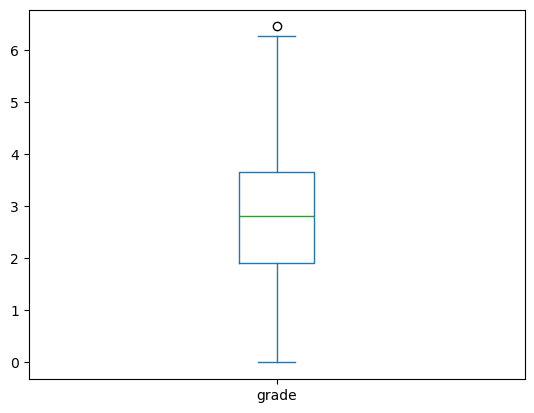

In [488]:
# print(df["grade"].plot.box())

df.loc[filtering, "grade"] = df["grade"].mean()

df["grade"].plot.box()

In [489]:
print(df[df["grade"] > 4.5])

      ID   Name  grade
9     10   학생10   4.68
69    70   학생70   5.42
132  133  학생133   4.64
183  184  학생184   5.58
248  249  학생249   6.27
306  307  학생307   5.70
379  380  학생380   5.10
384  385  학생385   5.02
402  403  학생403   5.14
439  440  학생440   6.19
488  489  학생489   6.45
547  548  학생548   5.62
559  560  학생560   5.35
568  569  학생569   5.45
616  617  학생617   5.14
704  705  학생705   4.52
732  733  학생733   6.21
771  772  학생772   5.77
830  831  학생831   5.90
862  863  학생863   5.10
899  900  학생900   5.64
906  907  학생907   6.07
913  914  학생914   6.12
962  963  학생963   5.29
982  983  학생983   5.40
